# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [8]:

# Question 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Clean Price Variable in Airbnb Data ###
airbnb_df = pd.read_csv("airbnb_hw.csv")

# Remove dollar signs and commas, then convert to numeric
airbnb_df['Price'] = airbnb_df['Price'].astype(str).str.replace(r'[\$,]', '', regex=True)
airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'], errors='coerce')

# Count missing values
missing_price = airbnb_df['Price'].isna().sum()
print(f"Missing values in Price: {missing_price}")

### 2. Clean subject_injury in MN Police Use-of-Force Data ###
police_df = pd.read_csv("mn_police_use_of_force.csv")

# Replace missing values with "No" and standardize case
police_df['subject_injury'] = police_df['subject_injury'].fillna("No").str.strip().str.capitalize()

# Compute proportion of missing values before cleaning
missing_subject_injury = police_df['subject_injury'].isna().mean()
print(f"Proportion of missing values in subject_injury (before cleaning): {missing_subject_injury:.2%}")

# Cross-tabulation of subject_injury with force_type
force_crosstab = pd.crosstab(police_df['subject_injury'], police_df['force_type'])
print(force_crosstab)



### 3. Clean WhetherDefendantWasReleasedPretrial Variable ###
# Load the justice data file
justice_df = pd.read_parquet("justice_data.parquet")

# Check if the column exists
if 'WhetherDefendantWasReleasedPretrial' in justice_df.columns:
    # Convert Yes/No to 1/0, keeping missing values
    justice_df['WhetherDefendantWasReleasedPretrial'] = justice_df['WhetherDefendantWasReleasedPretrial'].replace(
        {"Yes": 1, "No": 0}
    ).astype(float)
else:
    print("Column 'WhetherDefendantWasReleasedPretrial' not found in dataset.")



### 4. Clean ImposedSentenceAllChargeInContactEvent ###
# Check if the column exists
if 'ImposedSentenceAllChargeInContactEvent' in justice_df.columns and 'SentenceTypeAllChargesAtConvictionInContactEvent' in justice_df.columns:
    # Count missing values
    missing_sentence = justice_df['ImposedSentenceAllChargeInContactEvent'].isna().sum()
    print(f"Missing values in ImposedSentenceAllChargeInContactEvent: {missing_sentence}")

    # Compare missingness with SentenceTypeAllChargesAtConvictionInContactEvent
    sentence_type_distribution = justice_df.groupby('SentenceTypeAllChargesAtConvictionInContactEvent')[
        'ImposedSentenceAllChargeInContactEvent'
    ].apply(lambda x: x.isna().mean())

    print(sentence_type_distribution)
else:
    print("Column 'ImposedSentenceAllChargeInContactEvent' or 'SentenceTypeAllChargesAtConvictionInContactEvent' not found.")

Missing values in Price: 0
Proportion of missing values in subject_injury (before cleaning): 0.00%
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  2          8144               1552        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             60                108           87   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   1                          170   
Yes                                  2                            0   

force_type      Police K9 Bite  Taser  
subject_injury                

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [12]:
conda install -c anaconda xlrd

Channels:
 - anaconda
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /Users/kendalllokay/anaconda3

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.12.31 |       hecd8cb5_0         136 KB  anaconda
    certifi-2025.1.31          |  py311hecd8cb5_0         165 KB  anaconda
    charset-normalizer-3.3.2   |     pyhd3eb1b0_0          42 KB  anaconda
    conda-24.11.3              |  py311hecd8cb5_0         1.2 MB  anaconda
    packaging-24.2             |  py311hecd8cb5_0         185 KB  anaconda
    setuptools-75.8.0          |  py311hecd8cb5_0         2.2 MB  anaconda
    tqdm-4.66.5                |  py311h85bffb1_0         152 KB  anaconda
    xlrd-2.0.1                 |     pyhd3eb1b0_1          93 KB  anaconda
    ------------------------------------------------------------


Original Column Names: Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')
Cleaned Column Names: Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')
Year Range: {shark_df['Year'].min()} to {shark_df['Year'].max()}


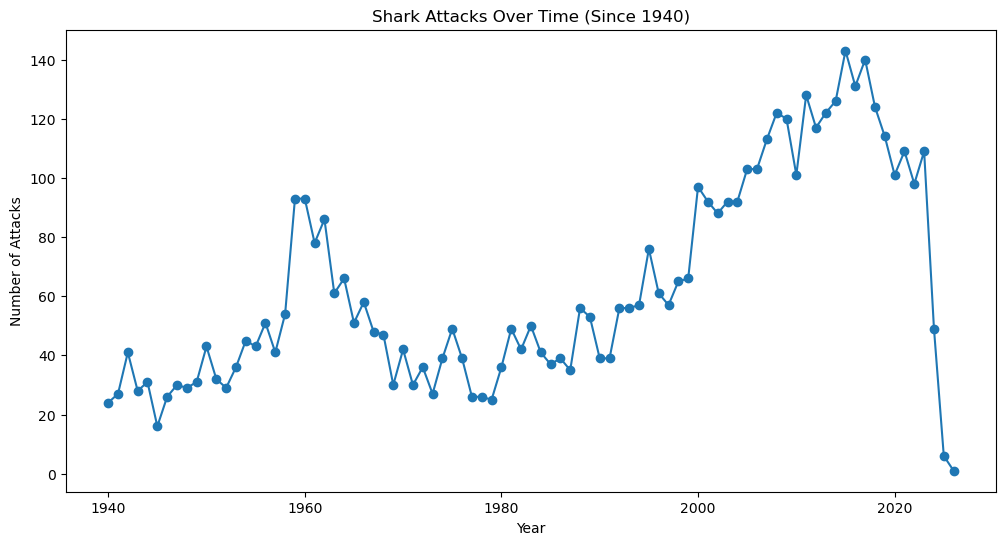

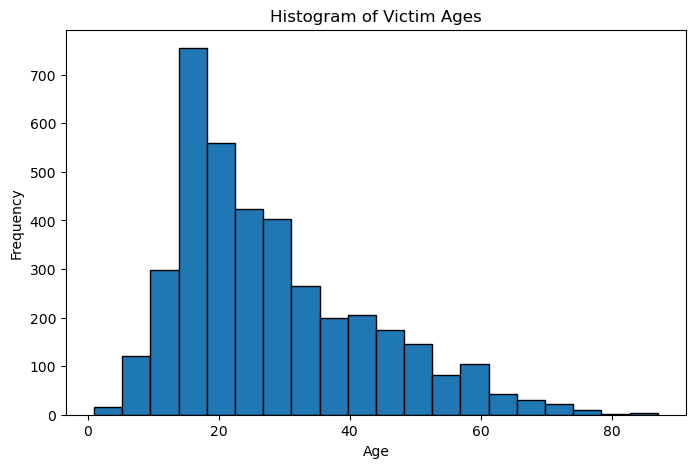

Proportion of male victims: 80.28%
Proportion of unprovoked attacks: 73.70%
Type   Provoked   Unknown  Unprovoked
Sex                                  
 M     0.000000  0.000000    0.000201
.      0.000000  0.001179    0.000000
F      0.053448  0.107311    0.134403
M      0.944828  0.889151    0.864794
M      0.000000  0.000000    0.000401
M x 2  0.000000  0.001179    0.000000
N      0.001724  0.001179    0.000000
lli    0.000000  0.000000    0.000201
Fatal Y/N          N   Unknown         Y
Type                                    
Provoked    0.948357  0.018779  0.032864
Unknown     0.374167  0.462500  0.163333
Unprovoked  0.740734  0.016495  0.242771
Fatal Y/N         N   Unknown         Y
Sex                                    
 M         1.000000  0.000000  0.000000
.          0.000000  0.000000  1.000000
F          0.758838  0.089646  0.151515
M          0.696063  0.083200  0.220738
M          1.000000  0.000000  0.000000
M x 2      0.000000  1.000000  0.000000
N          0.500000

In [13]:
# Question 2


# Load the Excel file
shark_df = pd.read_excel("shark_data.xls")

# Print column names to check for issues
print("Original Column Names:", shark_df.columns)

# Standardize column names
shark_df.columns = shark_df.columns.str.strip()

# Print cleaned column names
print("Cleaned Column Names:", shark_df.columns)


# Drop completely empty columns
shark_df = shark_df.dropna(axis=1, how='all')

# Clean and analyze the Year variable
shark_df['Year'] = pd.to_numeric(shark_df['Year'], errors='coerce')
print("Year Range: {shark_df['Year'].min()} to {shark_df['Year'].max()}")

# Filter for attacks since 1940
shark_recent = shark_df[shark_df['Year'] >= 1940]

# Analyze trends over time
attacks_per_year = shark_recent.groupby('Year').size()
plt.figure(figsize=(12, 6))
plt.plot(attacks_per_year, marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Shark Attacks Over Time (Since 1940)")
plt.show()

# Clean and analyze the Age variable
shark_df['Age'] = pd.to_numeric(shark_df['Age'], errors='coerce')
plt.figure(figsize=(8, 5))
plt.hist(shark_df['Age'].dropna(), bins=20, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Victim Ages")
plt.show()

# Proportion of victims that are male
male_proportion = (shark_df['Sex'] == 'M').mean()
print(f"Proportion of male victims: {male_proportion:.2%}")

# Clean the Type variable
shark_df['Type'] = shark_df['Type'].str.strip().str.capitalize()
shark_df['Type'] = shark_df['Type'].apply(lambda x: x if x in ['Provoked', 'Unprovoked'] else 'Unknown')

# Proportion of attacks that are unprovoked
unprovoked_proportion = (shark_df['Type'] == 'Unprovoked').mean()
print(f"Proportion of unprovoked attacks: {unprovoked_proportion:.2%}")

# Clean the Fatal Y/N variable
shark_df['Fatal Y/N'] = shark_df['Fatal Y/N'].apply(lambda x: x if x in ['Y', 'N'] else 'Unknown')

# Are unprovoked attacks more common on men or women?
attack_gender = pd.crosstab(shark_df['Sex'], shark_df['Type'], normalize='columns')
print(attack_gender)

# Is fatality rate different for provoked vs. unprovoked?
fatality_rate = pd.crosstab(shark_df['Type'], shark_df['Fatal Y/N'], normalize='index')
print(fatality_rate)

# Is fatality rate different for men vs. women?
gender_fatality = pd.crosstab(shark_df['Sex'], shark_df['Fatal Y/N'], normalize='index')
print(gender_fatality)

# Proportion of attacks by white sharks
shark_df['Species'] = shark_df['Species'].astype(str).str.lower()

shark_df['White_Shark'] = shark_df['Species'].str.contains('white shark', na=False)
white_shark_proportion = shark_df['White_Shark'].mean()
print(f"Proportion of attacks by white sharks: {white_shark_proportion:.2%}")


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

In [14]:
# Question 4

# 1) The US census collected race data using a self identification method
# 2) We gather this data to understand the demographics of the U.S. This data influences policymakers and laws for certain regions. Data quality matters to ensure proper information.
# 3) Expanded write ins helped people better describe their race/ethnicity. A better description for the difference between race and ethnicity was missing.
#    A better description of races and more options could help represent the diversity within racial groups. Yes some of the census's better aspects could be implemented to acquire better data.
# 4) The census only asked about sex and left out gender as a question. While the question was simple and direct, it left out gender as a question. In the future it should add gender as a question.
# 5) There are several risks with data cleaning when handling sex, gender, etc. Privacy risks, whereas over detailed data can expose individuals. Missing values can lead to underrepresentation.
#     Some bad characteristics people might adopt would be forcing assumptions such as sex based on name. However some good practices might be transparency in how missing data is handled.
# 6) Some concerns I would have would be accuracy and bias which rely on flawed assumptions, ethical issues, legal risks, and social harm.